In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib

from itertools import combinations

In [2]:
from sys import path
path.append("../utils/")

from utils import get_datasets

In [3]:
PD_DATASETS_DIR = "/home/welton/data/pd_datasets"
DATASETS = ["20ng", "acm", "webkb", "reut"]

In [4]:
def pair_wise(orig_df, clf_list):

    rates = []
    df = orig_df[clf_list]
    label = orig_df.label.values
    for clf1, clf2 in combinations(clf_list, 2):

        p1 = df[clf1].values
        p2 = df[clf2].values

        # Looking at where the classifiers predicted equal.
        total_common = np.sum(p1 == p2) / df.shape[0]
        total_common_count = np.round(total_common * 100, decimals=4)

        hits_p1 = label == p1
        hits_p2 = label == p2

        # Looking at where the classifiers predicted right and equal.
        common_hits = np.sum(hits_p1 * hits_p2) / df.shape[0]
        common_hits_counts = np.round(common_hits * 100, decimals=4)

        # Looking at where the classifiers predicted wrong and equal.
        common = p1 == p2
        common_misses_count = np.sum(label[common] != p1[common]) / df.shape[0]
        common_misses_count = np.round(common_misses_count * 100, decimals=4)

        # Looking at where the classifiers predicted different.
        total_diff = np.round(
            (np.sum(p1 != p2) / df.shape[0]) * 100, decimals=4)

        diff = p1 != p2
        # Looking at where the classifier c1 hit and not c2 hit.
        c1 = label[diff] == p1[diff]
        c1 = np.round(np.sum((c1 / df.shape[0]) * 100), decimals=4)

        # Looking at where the classifier c1 hit and not c2 hit.
        c2 = label[diff] == p2[diff]
        c2 = np.round(np.sum((c2 / df.shape[0]) * 100), decimals=4)

        completment = c1 + c2

        rates.append([f"{clf1} - {clf2}", total_common_count, common_hits_counts,
                     common_misses_count, total_diff, c1, c2, completment, total_diff - c1 - c2])

    cols = ["Pair", 
            "Common Pred. (%)",
            "Common Hits (%)",
            "Commom Misses (%)",
            "Diff Predition (%)",
            "CLF1 Hit (%)",
            "CLF2 Hit (%)",
            "Complement (%)",
            "None (%)"]
    return pd.DataFrame(rates, columns=cols)


In [5]:
pd_datasets = get_datasets(DATASETS, path=f"{PD_DATASETS_DIR}/__dset__.csv", sep=";")

In [7]:
pd_datasets["20ng"].shape

(18846, 26)

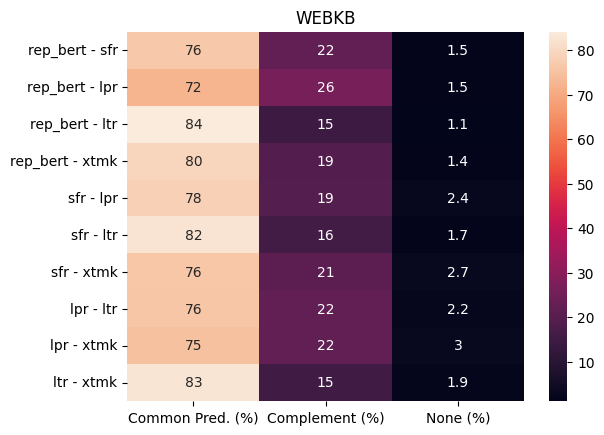

In [ ]:
def heatmap(dset, pd_datasets, clf_list=["rep_bert", "sfr", "lpr", "ltr", "xtmk"]):
    
    cols_to_drop = ["Pair",
        "Common Hits (%)",
        "Commom Misses (%)",
        "Diff Predition (%)",
        "CLF1 Hit (%)",
        "CLF2 Hit (%)"]

    df = pd_datasets[dset]
    rates = pair_wise(df, clf_list)
    ax = plt.axes()
    #plt.xticks(rotation=90)
    heatmap = sbn.heatmap(rates.drop(columns=cols_to_drop), yticklabels=rates.Pair.values, annot=True)
    _ = ax.set_title(dset.upper())

heatmap("webkb", pd_datasets)

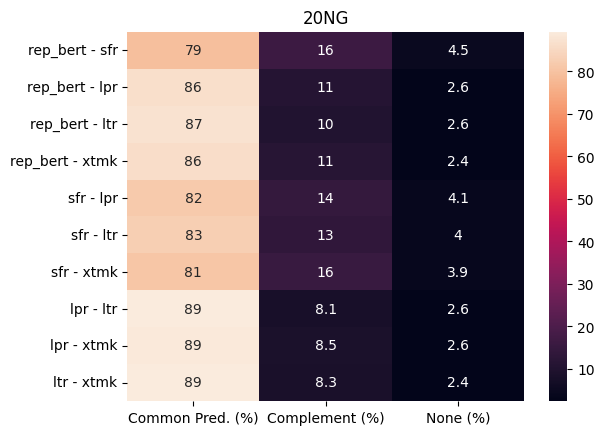

In [54]:
heatmap("20ng", pd_datasets)

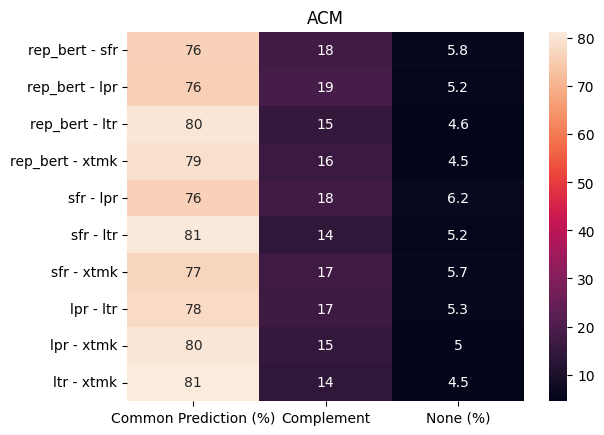

In [38]:
heatmap("acm", pd_datasets)

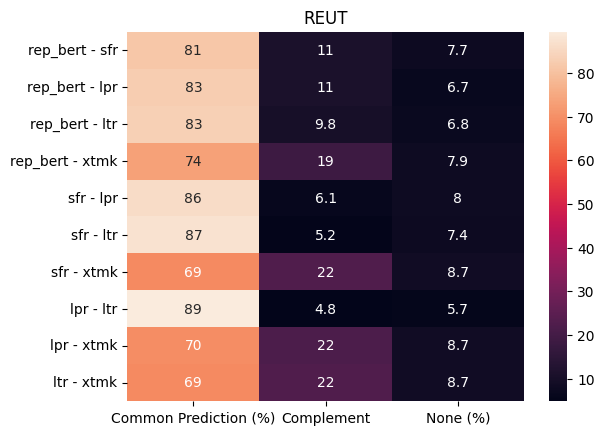

In [39]:
heatmap("reut", pd_datasets)